## * 想解決的問題：
#### 外國朋友要來台灣玩，問了住宿的大概預算。因為很少在台灣使用airbnb，所以藉分析資料，來看房價大致分布。

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## 讀入套件

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline      

In [3]:
# from plotly import tools
from plotly.offline import iplot
from plotly.offline import init_notebook_mode

In [4]:
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as ts
import plotly.figure_factory as ff

In [5]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 資料來源 http://insideairbnb.com/get-the-data.html

### 有差不多一年份的資料，以及到明年目前的房客預訂情況。

In [6]:
calendar = pd.read_csv('/Users/sourchen/Downloads/calendar.csv')
print('我們有',calendar.date.nunique() , '天還有' , calendar.listing_id.nunique() ,'不同的清單在我們的calendar中')
print(calendar.date.min() , calendar.date.max())
calendar.head()


我們有 369 天還有 10016 不同的清單在我們的calendar中
2019-11-30 2020-12-02


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1769554,2019-12-01,f,"$1,985.00","$1,985.00",2.0,35.0
1,876209,2019-12-01,f,"$1,282.00","$1,282.00",5.0,1125.0
2,876209,2019-12-02,f,"$1,282.00","$1,282.00",5.0,1125.0
3,876209,2019-12-03,f,"$1,282.00","$1,282.00",5.0,1125.0
4,876209,2019-12-04,f,"$1,313.00","$1,313.00",5.0,1125.0


## Airbnb的淡旺季

#### available : False，代表說是旺季（比較熱門）

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0, 0.5, '%Busy')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


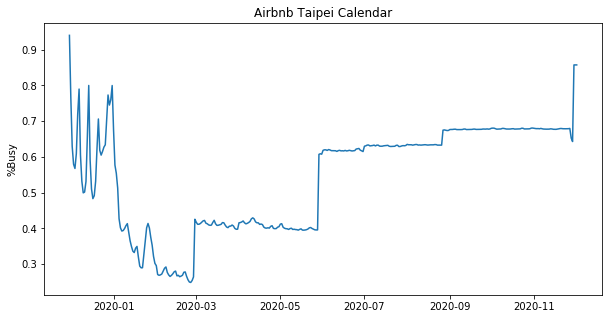

In [7]:
new_calendar = calendar[['date' , 'available']]
new_calendar['busy'] = new_calendar.available.map(lambda x:0 if x == 't' else 1)
new_calendar = new_calendar.groupby('date')['busy'].mean().reset_index()

new_calendar['date'] = pd.to_datetime(new_calendar['date'])

plt.figure(figsize = (10 , 5))
plt.plot(new_calendar['date'] , new_calendar['busy'])
plt.title('Airbnb Taipei Calendar')
plt.ylabel('%Busy')

## 價格資料

#### 12月價格超高

Text(0, 0.5, 'Month')

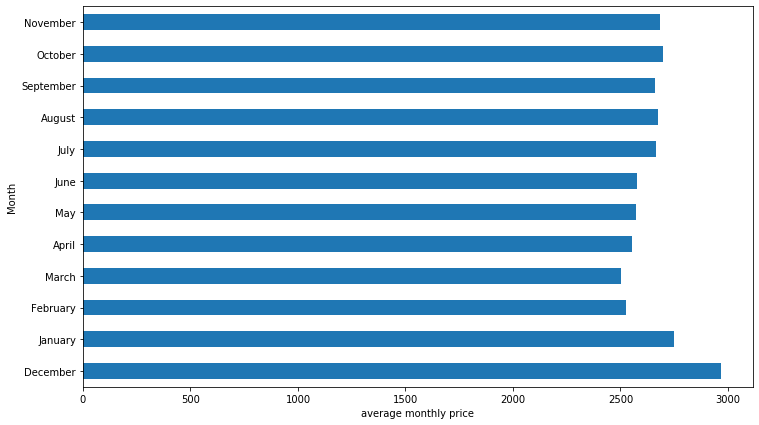

In [8]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',','').str.replace('$' , '').astype(float)

mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B') , sort = False)['price'].mean()

mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price')
plt.ylabel('Month')

In [9]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = calendar.dayofweek.unique().tolist()
price_week = calendar.groupby('dayofweek')['price'].mean().reindex(cats)

#### 禮拜五、六人很多

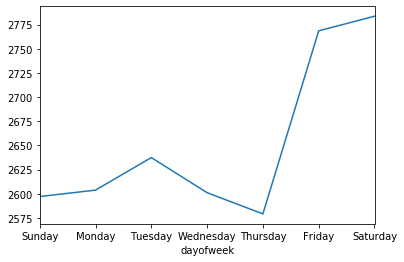

In [10]:
price_week.plot()

In [23]:
listing = pd.read_csv('/Users/sourchen/Downloads/listings.csv')
print('We have' , listing.id.nunique() , 'listings in the listing data')
listing.info()
listing.head(3)

We have 10016 listings in the listing data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 8.1+ MB


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,68396,https://www.airbnb.com/rooms/68396,20191130195643,2019-12-01,Zhongxiao Dunhua Studio C near MRT,Prime location! Right in the center of Taipei'...,Located at Zhongxiao East Road of Daan distric...,Prime location! Right in the center of Taipei'...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,12,12,0,0,0.03
1,68398,https://www.airbnb.com/rooms/68398,20191130195643,2019-12-01,Tonghua Vacation Studio C near MRT & Taipei 101,Convenient location; close to MRT and walking ...,Private Studio apartment with ensuite bathroom...,Convenient location; close to MRT and walking ...,none,Locates in a quiet neighborhood of Tonghua Str...,...,f,f,strict_14_with_grace_period,f,f,12,12,0,0,0.08
2,74641,https://www.airbnb.com/rooms/74641,20191130195643,2019-12-01,黑白雙人房@南京復興站｡小巨蛋斜對面｡溫泉式浴缸｡,"私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...","你的套房裡有清爽安靜的空間,舒服的衛浴設備,無線網路Wi-fi,旅行需要洗衣服也沒問題,有洗...","私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",none,This area is what we called Business & Residen...,...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.49


## 房價大致分布

#### 30萬太貴了吧......
#### 62元是租停車場嗎?!
#### 平均2498就可以住一晚，好佛

count     10016.000000
mean       2549.528055
std        8899.049291
min          61.000000
25%        1008.000000
50%        1557.000000
75%        2504.000000
max      305310.000000
Name: price, dtype: float64


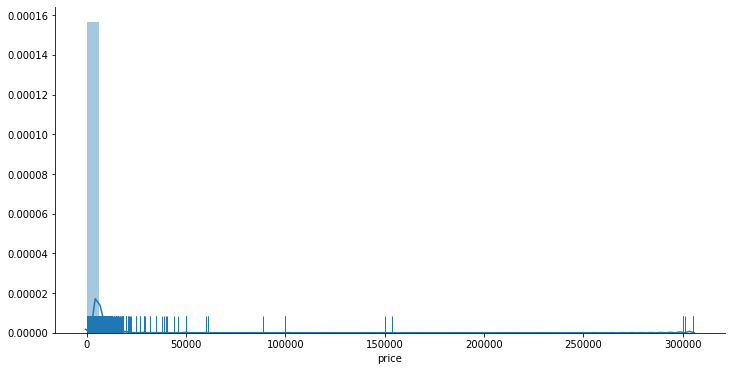

In [24]:
listing['price'] = listing['price'].str.replace(',' , '').str.replace('$' , '').astype(float)

print(listing.price.describe())
plt.figure(figsize = (12 , 6))
sns.distplot(listing.price.dropna() , rug = True)
sns.despine()

In [25]:
listing[listing.price > 290000]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
371,3783777,https://www.airbnb.com/rooms/3783777,20191130195643,2019-12-01,Room in Beitou,It's my house. Old style taiwanese room in old...,NaN,It's my house. Old style taiwanese room in old...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,13,0,6,7,0.09
456,4412881,https://www.airbnb.com/rooms/4412881,20191130195643,2019-12-01,市府捷運站Metro TaipeiCityHall Cozy room,訂房前請先讀所有事項Important!!! Before you booking the ...,The room size: 210 CM * 195 CM The room only p...,訂房前請先讀所有事項Important!!! Before you booking the ...,none,"During you stay, you are recommended to visit ...",...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.13
495,4607827,https://www.airbnb.com/rooms/4607827,20191130195643,2019-12-01,市府捷運站Metro Taipei CityHall bunk bed,訂房前請先讀所有事項 Important!!! Before you booking the...,*The room equipped with solid wood floor and b...,訂房前請先讀所有事項 Important!!! Before you booking the...,none,"During you stay, you are recommended to visit ...",...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.07
524,4738149,https://www.airbnb.com/rooms/4738149,20191130195643,2019-12-01,市府捷運站Metro TaipeiCityHall Bunk bed,"Please check my other listings as well,as I of...",*The room equipped with TV & solid wood floor ...,"Please check my other listings as well,as I of...",none,"During you stay, you are recommended to visit ...",...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,NaN
1083,8525791,https://www.airbnb.com/rooms/8525791,20191130195643,2019-12-01,NaN,交通便宜,NaN,交通便宜,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
2315,14919394,https://www.airbnb.com/rooms/14919394,20191130195643,2019-12-01,"Nice apartment, Near MRT Songshan Airport","Mon logement est proche de parcs, le centre vi...",It's located right in the heart of sophicated ...,"Mon logement est proche de parcs, le centre vi...",none,There are a nice and quite famous restaurant c...,...,t,f,flexible,f,f,1,1,0,0,0.03
4012,21711457,https://www.airbnb.com/rooms/21711457,20191130195643,2019-11-30,Habitat of Wanderers,Hi,NaN,Hi,none,NaN,...,t,f,flexible,f,f,1,0,0,1,0.04


#### 把高於50,000的房子去掉，再畫一遍
#### 看看大致一晚房價分佈

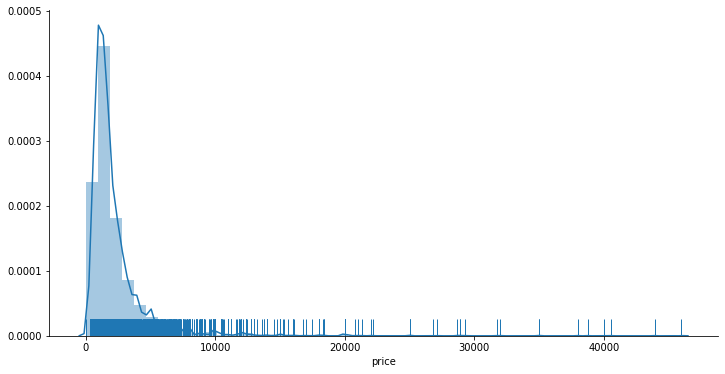

In [27]:
plt.figure(figsize = (12 , 6))
sns.distplot(listing[listing.price < 50000].price.dropna() , rug = True)
sns.despine()

#### 都差不多2000，真的蠻便宜的

Text(0.5, 0, 'Listing price')

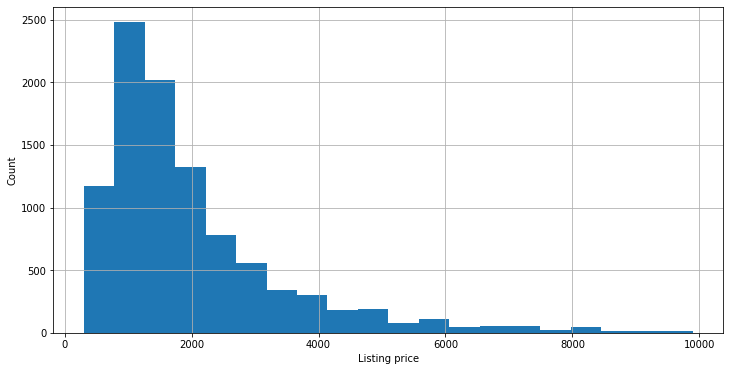

In [29]:
plt.figure(figsize = (12,6))
listing.loc[(listing.price < 10000) & (listing.price > 300)].price.hist(bins  = 20)
plt.ylabel('Count')
plt.xlabel('Listing price')

#### 冷氣、wifi是標配

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

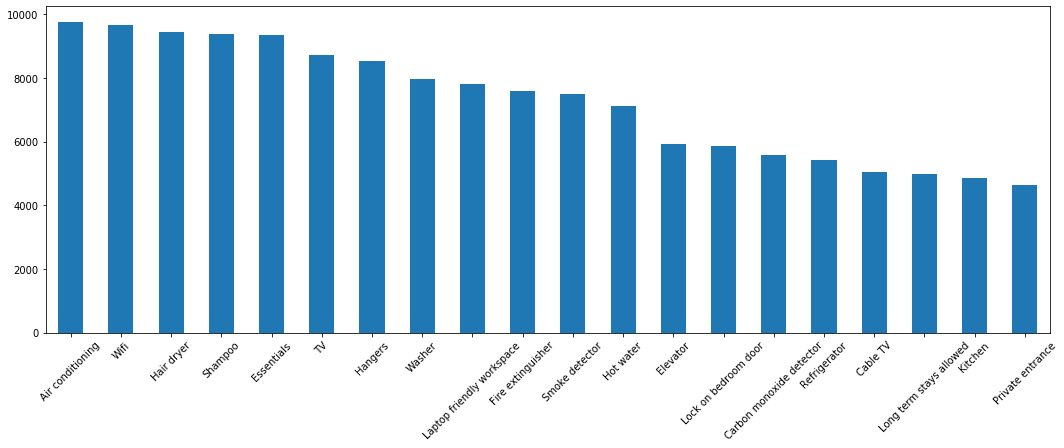

In [33]:
listing['amenities'] = listing.amenities.str.replace('[{}]' , '').str.replace('"','')
listing.amenities.head()
all_item_ls = np.concatenate(listing.amenities.map(lambda am:am.split(',')))
Top20_item = pd.Series(all_item_ls).value_counts().head(20)
plt.figure(figsize=  (18 , 6))
Top20_item.plot(kind = 'bar')
plt.xticks(rotation = 45)